<div style="background-color: #c3e8fb; padding: 10px; color: #144d84;">
<b>Question 2) cifar10 classification with cnn architecture</b><br>

</div>

In [1]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


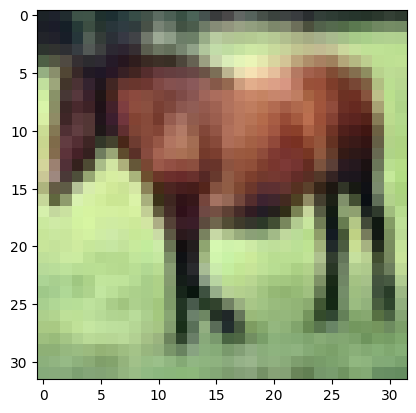

In [3]:
plt.imshow(x_train[7])

In [4]:
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0

In [5]:
y_train[0:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [6]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [7]:
y_train[0:10]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]])

In [8]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),  
    Dropout(0.5),
    Dense(10, activation='softmax')  
])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,210 (121.91 KB)

 Trainable params: 31,210 (121.91 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
opt_rms = keras.optimizers.RMSprop(learning_rate=0.001,decay=1e-6)

model.compile(optimizer=opt_rms,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [10]:
model.fit(x_train, y_train,
                    epochs=25,
                    batch_size=64,
                    validation_data=(x_test, y_test))

Epoch 1/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.2431 - loss: 2.0213 - val_accuracy: 0.3760 - val_loss: 1.7920
Epoch 2/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4291 - loss: 1.5704 - val_accuracy: 0.4928 - val_loss: 1.4194
Epoch 3/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4947 - loss: 1.4197 - val_accuracy: 0.4525 - val_loss: 1.4825
Epoch 4/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5272 - loss: 1.3318 - val_accuracy: 0.4974 - val_loss: 1.4922
Epoch 5/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5556 - loss: 1.2530 - val_accuracy: 0.5413 - val_loss: 1.2868
Epoch 6/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5719 - loss: 1.2008 - val_accuracy: 0.5891 - val_loss: 1.1605
Epoch 7/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5962 - loss: 1.1516 - val_accuracy: 0.6020 - val_loss: 1.1270
Epoch 8/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6123 - loss: 1.1078 - val_accuracy: 0

In [12]:
results = model.evaluate(x_test, y_test)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6841 - loss: 0.9477
Final test set loss: 0.946672
Final test set accuracy: 0.684500


#### Changing hyper parameters

In [14]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, callbacks=[early_stopping])

Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6842 - loss: 0.9391 - val_accuracy: 0.6857 - val_loss: 0.9352
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6776 - loss: 0.9444 - val_accuracy: 0.6731 - val_loss: 0.9780
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6756 - loss: 0.9524 - val_accuracy: 0.7025 - val_loss: 0.8930
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6800 - loss: 0.9459 - val_accuracy: 0.6766 - val_loss: 0.9438
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6810 - loss: 0.9457 - val_accuracy: 0.6875 - val_loss: 0.9395
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6757 - loss: 0.9576 - val_accuracy: 0.6533 - val_loss: 1.0203
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6796 - loss: 0.9554 - val_accuracy: 0.6717 - val_loss: 0.9729
Epoch 8/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6732 - loss: 0

so changing no. of epochs is pointless. we do it anyways.

adding more layers, and increasing no of epochs, and changing the optimizer

In [20]:
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
opt_adam = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt_adam,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
model.fit(x_train, y_train,
                    epochs=60,
                    batch_size=64,
                    validation_data=(x_test, y_test))

Epoch 1/60
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.2536 - loss: 1.9700 - val_accuracy: 0.5159 - val_loss: 1.3684
Epoch 2/60
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4844 - loss: 1.4154 - val_accuracy: 0.5824 - val_loss: 1.1835
Epoch 3/60
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5557 - loss: 1.2396 - val_accuracy: 0.6275 - val_loss: 1.0691
Epoch 4/60
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5960 - loss: 1.1392 - val_accuracy: 0.6394 - val_loss: 1.0106
Epoch 5/60
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6244 - loss: 1.0540 - val_accuracy: 0.6814 - val_loss: 0.9303
Epoch 6/60
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6488 - loss: 1.0002 - val_accuracy: 0.6652 - val_loss: 0.9475
Epoch 7/60
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6610 - loss: 0.9640 - val_accuracy: 0.7061 - val_loss: 0.8546
Epoch 8/60
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6753 - loss: 0.9295 - val_accuracy: 0

As can be seen, by increasing the number of layers, we were able to increase the accuracy. It is obvious that with even more layers, we could achieve even better accuracy. However, increasing the number of epochs did not have a significant impact on improving the model.

changing batch size

In [22]:
model.fit(x_train, y_train,
                    epochs=15,
                    batch_size=32,
                    validation_data=(x_test, y_test))

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.2812 - loss: 1.9096 - val_accuracy: 0.5115 - val_loss: 1.3448
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5039 - loss: 1.3710 - val_accuracy: 0.5826 - val_loss: 1.1980
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5695 - loss: 1.2172 - val_accuracy: 0.6286 - val_loss: 1.0583
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6029 - loss: 1.1140 - val_accuracy: 0.6679 - val_loss: 0.9535
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6282 - loss: 1.0521 - val_accuracy: 0.6821 - val_loss: 0.9256
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6460 - loss: 1.0109 - val_accuracy: 0.6900 - val_loss: 0.9014
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6607 - loss: 0.9679 - val_accuracy: 0.6918 - val_loss: 0.9055
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6734 - loss: 0.9288 -

changing batch size did not also make an improvement